Dataset Shape: (1067371, 8)
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB
None
-----------------------------------


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


-----------------------------------
Invoice         0.00
StockCode       0.00
Description     0.41
Quantity        0.00
InvoiceDate     0.00
Price           0.00
Customer ID    22.77
Country         0.00
dtype: float64
-----------------------------------
-----------------------------------
-----------------------------------


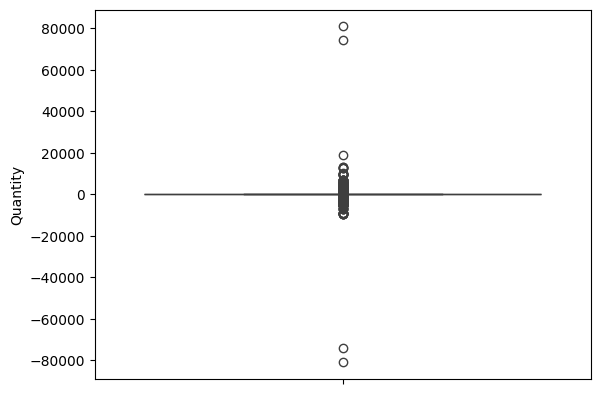

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading & Inspection

# Load the data
df = pd.read_csv("C:/Users/Admin/Documents/Customer-Segmentation-RFM/Data/online_retail_II.csv", encoding='unicode_escape')

# Initial inspection of dataset
print(f"Dataset Shape: {df.shape}")
print("-----------------------------------")
print(df.info())
print("-----------------------------------")
display(df.head())

# From initial inspection, seems like Description and CustomerID have null values, as they have lower non-null counts.
# Customer ID doesn't seem like it should be float data type

# Question 1: Are there negatives?

df.describe() # Shows summary stats of int and floats. Based on the min values, can see that there are negative values for quantity and price, and floats for ID

# Question 2: How many nulls are there in CustomerID?

percent_null = df.isnull().mean() * 100
print("-----------------------------------")
print(percent_null.round(2))

# There are 0.41% nulls in Description and 22.77% nulls in CustomerID

# Question 3: WHat's the spread of countries in the dataset?

print("-----------------------------------")
df['Country'].value_counts()

# Majority of records in the dataset are from the UK, accounting for 91.3% of the dataset

# Question 4: Are there invalid stock codes?

print("-----------------------------------")
df['StockCode'].value_counts().head(20)

# Question 5: Are there outliers?

print("-----------------------------------")
df.describe() # Check summary stats to compare 75% vs max value to see if there are extremes
# 75% for Qty is 1000 but the max is 80,995. 75% for Price is $415 but max is $38,970. Customer ID doesn't matter for this since it is an identifier.

sns.boxplot(y=df['Quantity']) # Shows outliers of 70,000 - 80,000 and -70,000 to -80,000 for the box plot
plt.show()

filtered_df = df[(df['Quantity'] > 60000) | (df['Quantity'] < -60000)] # Locate the outliers and see the details
filtered_df # Turns out customer 12346 and 16446 tried to make a bulk order and then cancelled. Both will be dropped from the dataset.

# Data inspection is complete. There are 4 outliers to remove, and a lot of blank customerID and descriptions. Proceed to data cleaning

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

# Load the data
df = pd.read_csv("C:/Users/Admin/Documents/Customer-Segmentation-RFM/Data/online_retail_II.csv", encoding='unicode_escape')

df_clean = df.copy() # Copies the original dataset, good data hygiene practices

# df_clean # To confirm it is the same as original copy

# Remove duplicates

print(f"Rows before duplicate drop: {df_clean.shape[0]}")
df_clean = df_clean.drop_duplicates()
print(f"Rows after duplicate drop:  {df_clean.shape[0]}")

# Drop rows where Customer ID is missing

cleaned_df_v2 = df_clean.dropna(subset=['Customer ID'])
cleaned_df_v2.info() # All data columns contain exactly 824,364 records

# Filter only UK records to zoom in focus

uk_df = cleaned_df_v2[cleaned_df_v2['Country'] == 'United Kingdom']
uk_df.info() # Retains only 741,301 records

# Keep only records with Quantity > 0, and remove extreme outliers

cleaned_df_v3 = uk_df[(uk_df['Quantity'] > 0) & (uk_df['Quantity'] < 60000)]
cleaned_df_v3.info() # Retained 725294 records

# Convert CustomerID from float to int

cleaned_df_v3['Customer ID'] = cleaned_df_v3['Customer ID'].astype(int)
cleaned_df_v3.info()

# Creating new column TotalSpent = Quantity * Price

cleaned_df_v3['Total Spent'] = cleaned_df_v3['Quantity'] * cleaned_df_v3['Price']
cleaned_df_v3.head() # To verify the new column is integrated properly

# Last check for descriptive stats

cleaned_df_v3.describe()

Rows before duplicate drop: 1067371
Rows after duplicate drop:  1033036
<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 716115 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      716115 non-null  object 
 1   StockCode    716115 non-null  object 
 2   Description  716115 non-null  object 
 3   Qua

C:\Users\Admin\AppData\Local\Temp\ipykernel_22912\1781343316.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_v3['Customer ID'] = cleaned_df_v3['Customer ID'].astype(int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_22912\1781343316.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_v3['Total Spent'] = cleaned_df_v3['Quantity'] * cleaned_df_v3['Price']


,Quantity,Price,Customer ID,Total Spent
count,700432.000000,700432.000000,700432.000000,700432.000000
mean,11.979337,3.065266,15550.358400,20.192655
std,58.989031,25.597692,1592.470164,86.656239
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,14194.000000,4.250000
50%,4.000000,1.950000,15547.000000,10.500000
75%,12.000000,3.750000,16933.000000,17.850000
max,12540.000000,10953.500000,18287.000000,38970.000000


In [ ]:
# RFM Analysis 

cleaned_df_v3.head() # To see data columns

cleaned_df_v3['InvoiceDate'] = pd.to_datetime(cleaned_df_v3['InvoiceDate'])

current_max_date = cleaned_df_v3['InvoiceDate'].max() # Find the most recent date
snapshot_date = current_max_date + pd.Timedelta(days=1) # Add 1 day to the most recent date to set it as "today" to analyse Recency

unique_invoice_count = cleaned_df_v3['Invoice'].nunique() # Use it as frequency. Count can't be used because one invoice can have multiple records

total_spent_sum = cleaned_df_v3['Total Spent'].sum() # Use as monetary to determine high value customers

# Aggregate RFM columns and group by customerID to appoint RFM columns to each Customer

rfm = cleaned_df_v3.groupby('Customer ID').agg({ 
    'InvoiceDate': 'max',      # Get the latest date
    'Invoice': 'nunique',      # Count unique invoices
    'Total Spent': 'sum'       # Sum the money
})

# Rename rfm columns to proper RFM terms

rfm.columns = ['LastPurchaseDate', 'Frequency', 'Monetary']

# Subtract the customer's last date from the "snapshot" (today)

rfm['Recency'] = (snapshot_date - rfm['LastPurchaseDate']).dt.days

# Check result

# rfm.head()

# Sort by Recency (Ascending), Frequency (Descending), Monetary (Descending)
top_customers = rfm.sort_values(
    by=['Recency', 'Frequency', 'Monetary'],
    ascending=[True, False, False]
)

top_customers.head(10) # Sorted to show top 10 best customers by RFM. However, this is inaccurate as it shos by latest order date first, even though monetary may be higher for 2nd customer

# To address limitation of raw sorting by numbers, we use binning to assign RFM scores.

# 1. Recency Score, labels are reversed
# I used labels=[5, 4, 3, 2, 1] because lower recency = higher score
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])

# 2. Frequency Score 
# I applied .rank(method='first') to handle the customers with same frequency
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

# 3. Monetary Score 
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# 4. Combine them into a string "RFM_Segment" (e.g., "555")
# I converted to string (astype(str)) so I can combine them like text
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# 5. Create a "Score Sum" (e.g., 15) for simpler analysis
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

# Check the result
rfm_scores_sorted = rfm.sort_values(by=['RFM_Score'],ascending=[False])

rfm_scores_sorted.head(10) # Shows the top 10 customers with perfect RFM scores, with 15 being the highest and 3 being the lowest.

,Segment,RFM_Score
Customer ID,,
12346,Can't Lose,8
12608,Hibernating,5
12745,Hibernating,6
12746,Hibernating,3
12747,Champions,15


C:\Users\Admin\AppData\Local\Temp\ipykernel_22912\3068736097.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


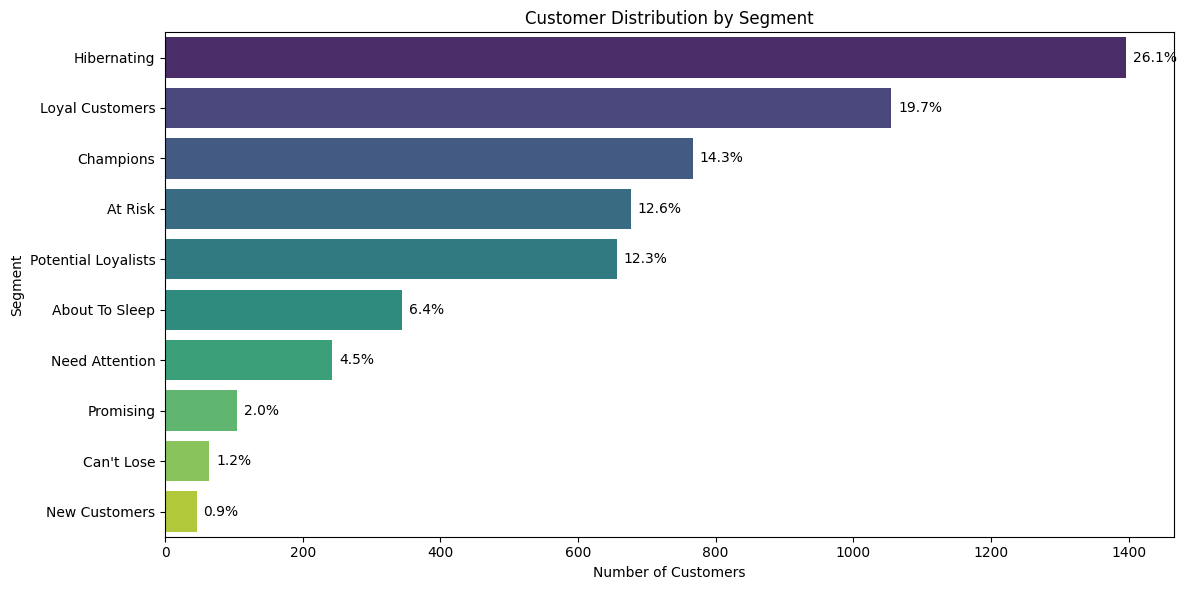

In [42]:
# Defining the segment map using regex logic
# Logic: Combining R and F scores determines the customer profile (e.g. R=5, F=5 -> Champions)

seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

# Combine R and F scores into a string to apply the map (e.g. "5" + "4" = "54")

rfm['RF_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str)

# Map the segments to the new column

rfm['Segment'] = rfm['RF_Score'].replace(seg_map, regex=True)

# Quick check to ensure segments are assigned correctly

display(rfm[['Segment', 'RFM_Score']].head())

# Group by segment to calculate average metrics

segment_analysis = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

# Add the raw count of customers in each segment

segment_analysis['Count'] = rfm.groupby('Segment')['Recency'].count()

# Add a percentage column 
# This shows the share of the total customer base for each segment

segment_analysis['Percentage'] = (segment_analysis['Count'] / segment_analysis['Count'].sum()) * 100

# Data Visualisation
# Sort the table by Count (descending) so the largest bars are at the top

segment_analysis_sorted = segment_analysis.sort_values(by='Count', ascending=False)

# Create the horizontal bar chart

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Count', 
    y=segment_analysis_sorted.index, 
    data=segment_analysis_sorted, 
    palette='viridis'
)

# Add percentage labels to each bar
# I looped through each bar and placed the text label at the end

for i, p in enumerate(ax.patches):
    # Get the percentage value for the current bar
    percentage = segment_analysis_sorted['Percentage'].iloc[i]
    
    # Place the text: x = end of bar, y = centre of bar
    ax.text(
        p.get_width() + 10,        # X position: slightly to the right of the bar
        p.get_y() + p.get_height() / 2, # Y position: centre of the bar
        f'{percentage:.1f}%',      # Text: e.g. "15.2%"
        va='center',               # Vertical alignment
        fontsize=10
    )

plt.title('Customer Distribution by Segment')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')

# Adjust layout to prevent labels being cut off

plt.tight_layout()
plt.show()

In [ ]:
# Business Recommendations
# Target the "Hibernating" Segment (26.1%): This is our largest segment. Since these customers have purchased before but have not returned in a long time, a re-engagement campaign (e.g. "We Miss You" discounts) is the highest priority to prevent churn.

# Reward "Champions" (14.3%): These frequent, high-spending customers drive revenue. They should be invited to a VIP loyalty programme to ensure they do not switch to competitors.

# Monitor "At Risk" (12.6%): These customers buy often but haven't visited recently. Immediate intervention is needed to prevent them from slipping into the "Hibernating" bucket.